In [110]:
import pandas as pd
pd.set_option('max_column', None)
pd.options.display.float_format = "{:.2f}".format

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

In [3]:
file_path = '../data/impression_log.csv'
df = pd.read_csv(file_path)
df = df.set_index(df.columns[0])
df.head()

,LogEntryTime,AdvertiserId,CampaignId,AdGroupId,AudienceID,CreativeId,AdFormat,Frequency,Site,FoldPosition,Country,Region,City,DeviceType,OSFamily,OS,Browser,DeviceMake,AdvertiserCurrency,click,engagement,video-end,video-start
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,
00006a06-14e2-47d9-b999-fbeeac67dd2b,2021-09-25 00:22:37,868ko1s,t29si1w,e9qf2dm,0,9wkrkl5j,300x250,0,scrabblewordfinder.org,4,United States,New York,Staten Island,4,5.00,173.00,7.00,Apple,0.01,0,0,0,0
00007898-29c9-43f1-82e5-43c5a856d0f4,2021-09-25 02:31:35,868ko1s,fiwemi8,8m750eh,0,zhre4utp,300x250,0,www.thecoli.com,2,United States,Massachusetts,Milton,4,5.00,173.00,7.00,Apple,0.00,0,0,0,0
0000d06f-5239-4123-af41-bd1c0e0e8d48,2021-09-25 20:12:52,868ko1s,awbu4q4,oropida,lnqjhqm,ab6spdyi,300x250,0,www.today.com,3,United States,New York,Brooklyn,4,6.00,156.00,6.00,Samsung,0.01,0,0,0,0
0000d623-aaf1-4be8-81f7-eb6c96b30aee,2021-09-22 16:04:12,868ko1s,t29si1w,e9qf2dm,0,2spj6krt,300x250,0,www.cbssports.com,4,United States,New York,Queens,4,5.00,101.00,7.00,Apple,0.01,0,0,0,0
0000e836-9778-4ea9-b686-9e7bf26f90bd,2021-09-22 14:33:59,868ko1s,awbu4q4,oropida,lnqjhqm,ql1q5nq9,300x250,0,backroadramblers.com,3,United States,New York,The Bronx,4,5.00,101.00,7.00,Apple,0.01,0,1,1,1


In [6]:
focus_columns = ['AdFormat', 'FoldPosition', 'OS', 'DeviceType', 'engagement']
focus_df = df[focus_columns]
focus_df.sort_values(by='engagement', ascending=False).head()

,AdFormat,FoldPosition,OS,DeviceType,engagement
Unnamed: 0,,,,,
3213e128-a614-406a-8718-5390d23cca76,320x480,2,145.00,4,1
561ebe56-340d-4d25-8bee-72025b0cabcc,300x250,4,156.00,4,1
2935f13a-027d-4311-bece-49e5c700b48f,300x250,4,174.00,4,1
4072fdf2-76b3-4b46-95ee-86773002b6e7,300x250,4,174.00,4,1
561ab7ff-937f-4811-9426-af5ec585f27c,320x480,3,174.00,4,1


In [7]:
# label encoding, the scalling
focus_df['AdFormat'].value_counts()

300x250    69962
320x480    30038
Name: AdFormat, dtype: int64

In [8]:
focus_df['FoldPosition'].value_counts()

4    52499
3    29769
2    17732
Name: FoldPosition, dtype: int64

In [10]:
focus_df['DeviceType'].value_counts()

4    93885
3     6064
1       51
Name: DeviceType, dtype: int64

In [28]:
focus_df['OS'].value_counts()
print('os')

os


In [108]:
new_df = focus_df.copy()

catagorical_columns = ['AdFormat', 'FoldPosition', 'DeviceType']
for column in catagorical_columns:
    new_df[f'{column}'] = new_df[f'{column}'].astype('category')

label_encode_df = new_df.copy()    

new_df = pd.get_dummies(new_df, columns=catagorical_columns)
new_df.head()


,OS,engagement,AdFormat_300x250,AdFormat_320x480,FoldPosition_2,FoldPosition_3,FoldPosition_4,DeviceType_1,DeviceType_3,DeviceType_4
Unnamed: 0,,,,,,,,,,
00006a06-14e2-47d9-b999-fbeeac67dd2b,173.00,0,1,0,0,0,1,0,0,1
00007898-29c9-43f1-82e5-43c5a856d0f4,173.00,0,1,0,1,0,0,0,0,1
0000d06f-5239-4123-af41-bd1c0e0e8d48,156.00,0,1,0,0,1,0,0,0,1
0000d623-aaf1-4be8-81f7-eb6c96b30aee,101.00,0,1,0,0,0,1,0,0,1
0000e836-9778-4ea9-b686-9e7bf26f90bd,101.00,1,1,0,0,1,0,0,0,1


In [77]:
new_df.isnull().sum()
# new_df = new_df.dropna()
new_df[new_df['OS'].isna()]

check = new_df.dropna()
check[check['OS'].isna()]
print(check.shape)

(99993, 10)


In [148]:
## Feature scalling
scaler = MinMaxScaler()

x_columns = ['OS', 'AdFormat_300x250', 'AdFormat_320x480',
       'FoldPosition_2', 'FoldPosition_3', 'FoldPosition_4', 'DeviceType_1',
       'DeviceType_3', 'DeviceType_4']

y_column = ['engagement']


check_scaled = scaler.fit_transform(check.to_numpy())
check_scaled = pd.DataFrame(check_scaled, columns=check.columns)
check_scaled.head()

print(check_scaled.shape)

x_scaled = check_scaled[x_columns]
y = check_scaled["engagement"]


(99993, 10)


In [149]:
check_scaled.isna().sum()

OS                  0
engagement          0
AdFormat_300x250    0
AdFormat_320x480    0
FoldPosition_2      0
FoldPosition_3      0
FoldPosition_4      0
DeviceType_1        0
DeviceType_3        0
DeviceType_4        0
dtype: int64

In [150]:
print(x_scaled.shape, y.shape)

(99993, 9) (99993,)


In [151]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)
lr = LinearRegression()

lr.fit(x_train, y_train)
score = lr.score(x_test, y_test)
print(score)



logistic = LogisticRegression()
logistic.fit(x_train, y_train)
score = logistic.score(x_test, y_test)

print(score)

0.018105272202571965
0.8703913594239616


In [152]:
logistic.coef_[0]

array([-0.01540359, -0.33889617,  0.34123157, -0.18102887,  0.07155325,
        0.11181101, -0.6231821 , -0.70073249,  1.32624999])

In [153]:
feature_importance_df = pd.DataFrame([list(logistic.coef_[0])], columns=x_train.columns)

In [154]:
feature_importance_df

,OS,AdFormat_300x250,AdFormat_320x480,FoldPosition_2,FoldPosition_3,FoldPosition_4,DeviceType_1,DeviceType_3,DeviceType_4
0,-0.02,-0.34,0.34,-0.18,0.07,0.11,-0.62,-0.70,1.33


<AxesSubplot:xlabel='index', ylabel='0'>

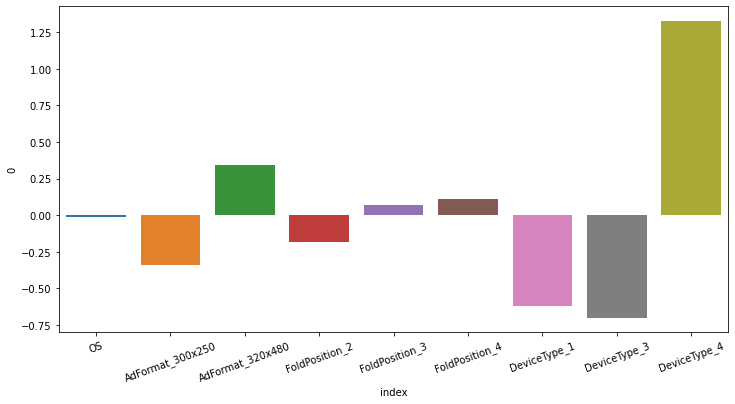

In [163]:
ab_df = feature_importance_df.transpose()
# feature_importance_df.reset_index()
ab_df = ab_df.reset_index()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xticks(rotation=20)
sns.barplot(x="index", y=0, data=ab_df)
# ab_df.columns

In [167]:
label_encode_df

,AdFormat,FoldPosition,OS,DeviceType,engagement
Unnamed: 0,,,,,
00006a06-14e2-47d9-b999-fbeeac67dd2b,0,2,173.00,2,0
00007898-29c9-43f1-82e5-43c5a856d0f4,0,0,173.00,2,0
0000d06f-5239-4123-af41-bd1c0e0e8d48,0,1,156.00,2,0
0000d623-aaf1-4be8-81f7-eb6c96b30aee,0,2,101.00,2,0
0000e836-9778-4ea9-b686-9e7bf26f90bd,0,1,101.00,2,1
...,...,...,...,...,...
64036091-29df-431f-9cc9-227db91923a0,0,2,101.00,1,0
64037b85-7630-473a-ae86-673c82b8238d,0,2,174.00,2,0
64048839-63ea-48c9-bc46-b33a8657b7f9,0,2,101.00,2,0


In [168]:
catagorical_columns = ['AdFormat', 'FoldPosition', 'DeviceType']

for column in catagorical_columns:
    label_encode_df[column] = LabelEncoder().fit_transform(label_encode_df[column])


In [169]:
label_encode_df

,AdFormat,FoldPosition,OS,DeviceType,engagement
Unnamed: 0,,,,,
00006a06-14e2-47d9-b999-fbeeac67dd2b,0,2,173.00,2,0
00007898-29c9-43f1-82e5-43c5a856d0f4,0,0,173.00,2,0
0000d06f-5239-4123-af41-bd1c0e0e8d48,0,1,156.00,2,0
0000d623-aaf1-4be8-81f7-eb6c96b30aee,0,2,101.00,2,0
0000e836-9778-4ea9-b686-9e7bf26f90bd,0,1,101.00,2,1
...,...,...,...,...,...
64036091-29df-431f-9cc9-227db91923a0,0,2,101.00,1,0
64037b85-7630-473a-ae86-673c82b8238d,0,2,174.00,2,0
64048839-63ea-48c9-bc46-b33a8657b7f9,0,2,101.00,2,0


In [170]:
label_encode_df.isnull().sum()
label_encode_df.dropna(inplace=True)
label_encode_df.isnull().sum()
print(label_encode_df.shape)

(99993, 5)


In [204]:
x_columns = ['AdFormat', 'FoldPosition', 'DeviceType', 'OS']
x = label_encode_df[x_columns]
y = label_encode_df['engagement']

x_scaled = MinMaxScaler().fit_transform(x.to_numpy())

x_scaled = pd.DataFrame(x_scaled, columns=x_columns)


In [205]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)
lr = LinearRegression()

lr.fit(x_train, y_train)
score = lr.score(x_test, y_test)
print(score)



logistic = LogisticRegression()
logistic.fit(x_train, y_train)
score = logistic.score(x_test, y_test)

print(score)

0.018476801860136893
0.8723581572104807


In [173]:
new_feature_importance_df = pd.DataFrame({'score':list(logistic.coef_[0]),'columns':x_train.columns})
new_feature_importance_df

,score,columns
0,0.70,AdFormat
1,0.24,FoldPosition
2,3.75,DeviceType
3,0.01,OS


In [174]:
import seaborn as sns

<AxesSubplot:xlabel='columns', ylabel='score'>

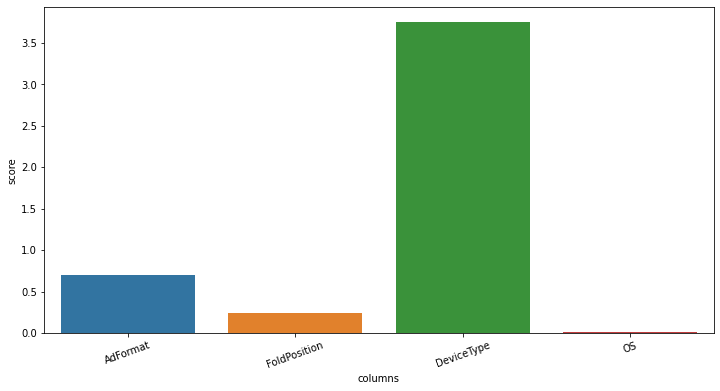

In [175]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xticks(rotation=20)
sns.barplot(x="columns", y="score", data=new_feature_importance_df)

In [176]:
from sklearn.metrics import mutual_info_score

In [228]:
# score = mutual_info_score(x_scaled['DeviceType'], y)
# print(score)
import numpy as np

# for colmn in x_scaled.columns:
#     print(f"{colmn} : ",mutual_info_score(x_scaled[colmn], list(y)))

# x_columns = ['AdFormat', 'FoldPosition', 'DeviceType', 'OS']
# x = label_encode_df[x_columns]
# y = label_encode_df['engagement']

# x_scaled = MinMaxScaler().fit_transform(x.to_numpy())

# x_scaled = pd.DataFrame(x_scaled, columns=x_columns)
scaled = MinMaxScaler().fit_transform(label_encode_df.to_numpy())
scaled_df = pd.DataFrame(scaled, columns=label_encode_df.columns)
scaled_df


x_values = scaled_df[x_columns]
y = scaled_df['engagement']

for colmn in x_values.columns:
    print(f"{colmn} : ",mutual_info_score(x_scaled[colmn], y))


AdFormat :  0.0067203492354639405
FoldPosition :  0.00043855439227317994
DeviceType :  0.005620998963784436
OS :  0.001483773343128503


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
